In [1]:
from pyspark import SparkConf, SparkContext
import collections
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.colorbar as cbar


In [2]:
conf = SparkConf().setMaster("local").setAppName("RatingsHistogram")
sc = SparkContext(conf = conf)

In [3]:
lines = sc.textFile("u.data")
ratings = lines.map(lambda x: x.split()[2])
result = ratings.countByValue()

In [4]:
sortedResults = collections.OrderedDict(sorted(result.items()))

In [5]:
for key, value in sortedResults.items():
    print("%s %i" % (key, value))

1 6110
2 11370
3 27145
4 34174
5 21201


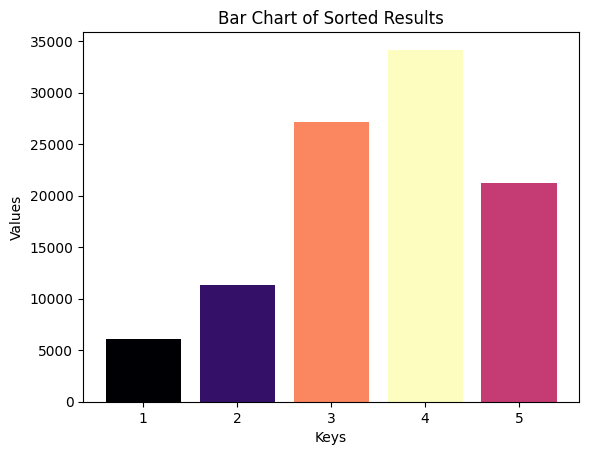

In [7]:
x = list(sortedResults.keys())
y = list(sortedResults.values())

# Normalize the values for the colormap
norm = plt.Normalize(min(y), max(y))
colors = cm.magma(norm(y))  # Apply the magma colormap

# Create a bar chart
plt.bar(x, y, color=colors)
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Bar Chart of Sorted Results')
plt.show()